In [1]:
import pandas as pd

In [2]:
import descartes
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
%matplotlib inline
import adjustText as aT
import geocoder

In [3]:
from missing_columns_pd import miss_cols

In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '{:,}'.format

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)


In [5]:
tdtypes = {'Store_Number':str,'Vendor_Number':str,'Item_Number':str, 'Category':str}

In [6]:
trans = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\transactions_2021.csv',dtype=tdtypes, index_col=0)

In [7]:
stores = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_2021.csv',index_col=0, dtype={'Zip_Code':str,'Store_Number':str})

In [8]:
stores.columns

Index(['Store_Number', 'Store_Name', 'Address', 'City', 'Zip_Code',
       'Store_Location', 'County_Number', 'County'],
      dtype='object')

In [9]:
store_trans = stores.merge(trans, how='inner', on=['Store_Number'])

In [71]:
census_combined5 = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\census data\census_combined5.csv',dtype={'Zip_Code':str},index_col=0)

In [74]:
list(census_combined5.columns)

['Zip_Code',
 'pct_Married-couple_household',
 'pct_High_school_graduate_or_higher',
 'pct_Bachelors_degree_or_higher',
 'Total_population',
 'Male',
 'Female',
 'Sex_ratio_(males_per_100_females)',
 'Under_5_years',
 '5_to_9_years',
 '10_to_14_years',
 '15_to_19_years',
 '20_to_24_years',
 '25_to_34_years',
 '35_to_44_years',
 '45_to_54_years',
 '55_to_59_years',
 '60_to_64_years',
 '65_to_74_years',
 '75_to_84_years',
 '85_years_and_over',
 'Median_age_(years)',
 'Under_18_years',
 '16_years_and_over',
 '18_years_and_over',
 '21_years_and_over',
 '62_years_and_over',
 '65_years_and_over',
 'Total_population_2015',
 'Median_age_2015',
 '18_years_and_over_2015',
 '21_years_and_over_2015',
 'OCCUPATION',
 'Civilian_employed_population_16_years_and_over',
 'Management,_business,_science,_and_arts_occupations',
 'Service_occupations',
 'Sales_and_office_occupations',
 'Natural_resources,_construction,_and_maintenance_occupations',
 'Production,_transportation,_and_material_moving_occupati

In [10]:
sales_by_zip = store_trans.groupby(['Zip_Code']).agg({'Sales':'sum'}).reset_index()

In [11]:
# sales_by_zip.head()

In [12]:
census_combined4 = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\census data\census_combined4.csv',dtype={'Zip_Code':str},index_col=0)

In [13]:
# census_combined4.info()

In [76]:
iowa_census_zip = census_combined5[['Zip_Code','Total_population','25_to_34_years','Median_age_(years)','population_density','Median_household_income_(dollars)','number_of_stores','county','population_per_store_None','pct_HH_income_75k_plus','Median_Home_Market_Value', 'pct_change_population','pct_Bachelors_degree_or_higher']]

In [15]:
iowa_census_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934 entries, 0 to 933
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Zip_Code                           934 non-null    object 
 1   Total_population                   934 non-null    float64
 2   25_to_34_years                     934 non-null    float64
 3   Median_age_(years)                 934 non-null    float64
 4   population_density                 934 non-null    float64
 5   Median_household_income_(dollars)  934 non-null    float64
 6   number_of_stores                   934 non-null    float64
 7   county                             934 non-null    object 
 8   population_per_store_None          470 non-null    float64
dtypes: float64(7), object(2)
memory usage: 73.0+ KB


In [16]:
miss_cols(iowa_census_zip)

[('population_per_store_None', 464, 0.4968)]

In [17]:
iowa_census_zip.shape

(934, 9)

In [18]:
# scott

census_combined4['county'].head()

0      Warren County
1       Adair County
2      Dallas County
3    Marshall County
4      Hardin County
Name: county, dtype: object

In [81]:
sales_by_zip2 = census_combined5[['Zip_Code']].merge(sales_by_zip,how='left',left_on='Zip_Code', right_on='Zip_Code')
sales_by_zip2.shape

(934, 2)

In [82]:
sales_by_zip2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934 entries, 0 to 933
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Zip_Code  934 non-null    object 
 1   Sales     470 non-null    float64
dtypes: float64(1), object(1)
memory usage: 21.9+ KB


In [85]:
sales_by_zip2 = sales_by_zip2.fillna(0)

In [86]:
sales_by_zip2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934 entries, 0 to 933
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Zip_Code  934 non-null    object 
 1   Sales     934 non-null    float64
dtypes: float64(1), object(1)
memory usage: 21.9+ KB


read in us shape file

In [24]:

us = gpd.read_file(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\census data\tl_2020_us_zcta520.shp')

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [25]:
pd.set_option('display.max_columns', None)
us.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,35592,35592,B5,G6350,S,298552385,235989,+33.7427261,-088.0973903,"POLYGON ((-88.24735 33.65390, -88.24713 33.654..."
1,35616,35616,B5,G6350,S,559506992,41870756,+34.7395036,-088.0193814,"POLYGON ((-88.13997 34.58184, -88.13995 34.582..."
2,35621,35621,B5,G6350,S,117838488,409438,+34.3350314,-086.7270557,"POLYGON ((-86.81659 34.34960, -86.81649 34.349..."
3,35651,35651,B5,G6350,S,104521045,574316,+34.4609087,-087.4801507,"POLYGON ((-87.53087 34.42492, -87.53082 34.429..."
4,36010,36010,B5,G6350,S,335675180,236811,+31.6598950,-085.8128958,"POLYGON ((-85.95712 31.67744, -85.95676 31.677..."


In [26]:
us.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33791 entries, 0 to 33790
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ZCTA5CE20   33791 non-null  object  
 1   GEOID20     33791 non-null  object  
 2   CLASSFP20   33791 non-null  object  
 3   MTFCC20     33791 non-null  object  
 4   FUNCSTAT20  33791 non-null  object  
 5   ALAND20     33791 non-null  int64   
 6   AWATER20    33791 non-null  int64   
 7   INTPTLAT20  33791 non-null  object  
 8   INTPTLON20  33791 non-null  object  
 9   geometry    33791 non-null  geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 2.6+ MB


In [27]:
type(us)

geopandas.geodataframe.GeoDataFrame

merge US census shape file with pop_per_zip_df

Note:  to create a geodataframe, the geodataframe must be on the left of the merge

In [87]:
iowa_pop_gdf = us.merge(iowa_census_zip,how='inner',left_on='ZCTA5CE20', right_on='Zip_Code')

In [89]:
# iowa_pop_gdf.info()

In [30]:
type(iowa_pop_gdf)

geopandas.geodataframe.GeoDataFrame

In [83]:
sales_by_zip2 = sales_by_zip2.fillna(0)

In [84]:
sales_by_zip2.head()

,Zip_Code,Sales
0,50001,0.0
1,50002,"82,798.6"
2,50003,"804,781.7"
3,50005,"33,853.37"
4,50006,"112,008.16"


In [90]:
# sales_by_zip2
iowa_pop_gdf = iowa_pop_gdf.merge(sales_by_zip2,how='inner',left_on='Zip_Code', right_on='Zip_Code')

In [34]:
type(iowa_pop_gdf)

geopandas.geodataframe.GeoDataFrame

In [91]:
iowa_pop_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 934 entries, 0 to 933
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   ZCTA5CE20                          934 non-null    object  
 1   GEOID20                            934 non-null    object  
 2   CLASSFP20                          934 non-null    object  
 3   MTFCC20                            934 non-null    object  
 4   FUNCSTAT20                         934 non-null    object  
 5   ALAND20                            934 non-null    int64   
 6   AWATER20                           934 non-null    int64   
 7   INTPTLAT20                         934 non-null    object  
 8   INTPTLON20                         934 non-null    object  
 9   geometry                           934 non-null    geometry
 10  Zip_Code                           934 non-null    object  
 11  Total_population                   93

In [36]:
# polk
polk_gdf = iowa_pop_gdf.loc[iowa_pop_gdf.county == 'Polk County']

In [37]:
polk_gdf['population_density'] = round(polk_gdf.population_density)

C:\Users\dgarb\AppData\Local\Temp/ipykernel_12452/1067307264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polk_gdf['population_density'] = round(polk_gdf.population_density)


In [92]:
# polk_gdf.head()

# Polk County

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


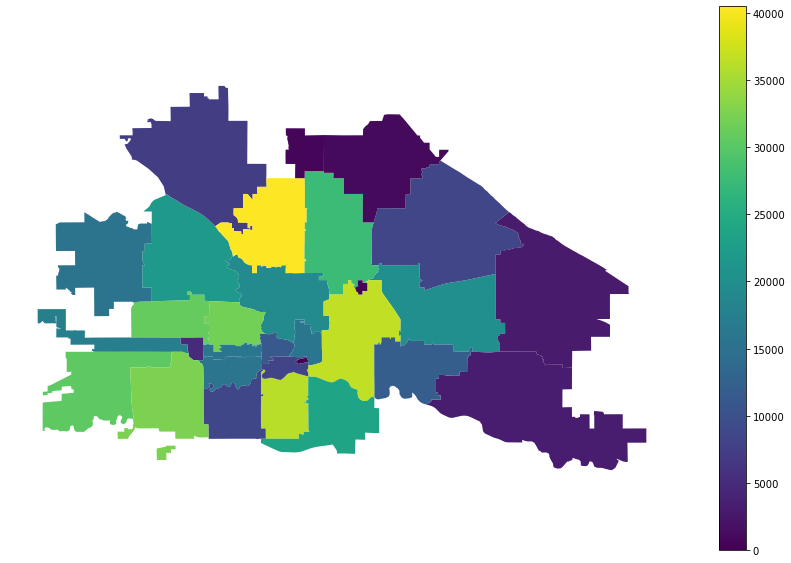

In [40]:
ax = polk_gdf.plot(column='Total_population',legend = True, figsize=(15, 10),
                      )
ax.set_axis_off(); # turns off axis labels

# Linn County

In [41]:
linn_gdf = iowa_pop_gdf.loc[iowa_pop_gdf.county == 'Linn County']

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


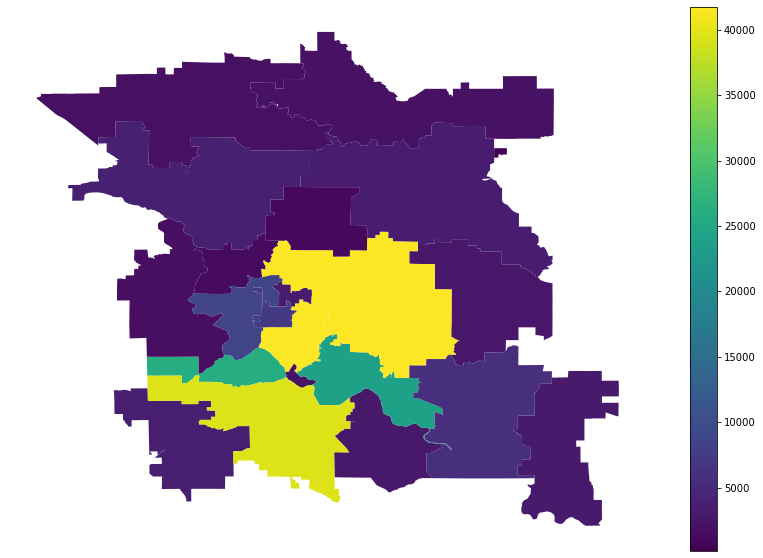

In [42]:
ax = linn_gdf.plot(column='Total_population',legend = True, figsize=(15, 10),
                      )
ax.set_axis_off(); # turns off axis labels

# Scott County

In [43]:
# scott
scott_gdf = iowa_pop_gdf.loc[iowa_pop_gdf.county == 'Scott County']

In [44]:
type(scott_gdf)

geopandas.geodataframe.GeoDataFrame

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


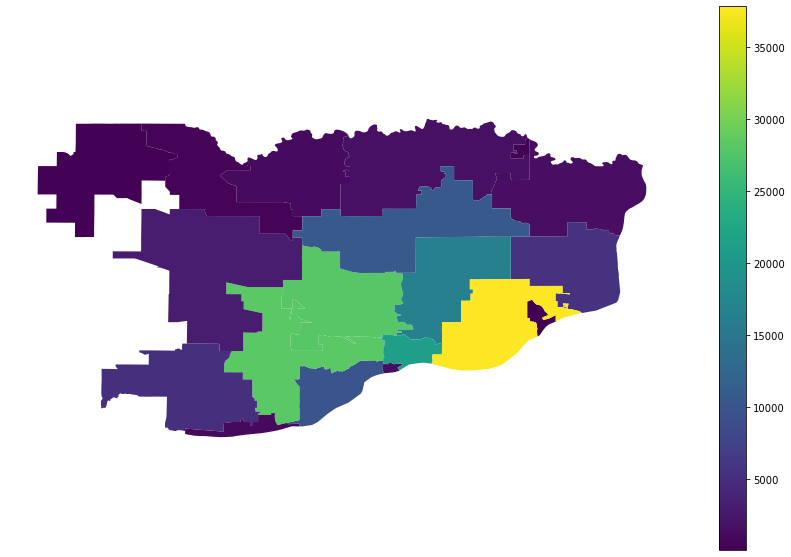

In [45]:
ax = scott_gdf.plot(column='Total_population',legend = True, figsize=(15, 10),
                      )
ax.set_axis_off(); # turns off axis labels

# Johnson

In [46]:
# ax = za.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
# texts = []

# for x, y, label in zip(za_points.geometry.x, za_points.geometry.y, za_points["name"]):
#     texts.append(plt.text(x, y, label, fontsize = 8))

# aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
#                arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

In [47]:
# Johnson
# johnson_gdf = iowa_pop_gdf.loc[iowa_pop_gdf.county == 'Johnson County']

In [48]:
# za = johnson_gdf[['Zip_Code','geometry','Total_population']]

# za["center"] = za["geometry"].centroid
# za_points = za.copy()
# za_points.set_geometry("center", inplace = True)

In [49]:
# ax = za.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
# texts = []

# for x, y, label in zip(za_points.geometry.x, za_points.geometry.y, za_points["Zip_Code"]):
#     texts.append(plt.text(x, y, label, fontsize = 8))

# aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
#                arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))
# ax.set_axis_off(); 
# # 52245

In [50]:
# Johnson
# ax = za.plot(column='Total_population',legend = True, figsize=(15, 10),
#                       )
# ax.set_axis_off(); # turns off axis labels

# Dubuque County

In [51]:
# Dubuque
Dubuque = iowa_pop_gdf.loc[iowa_pop_gdf.county == 'Dubuque County']

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


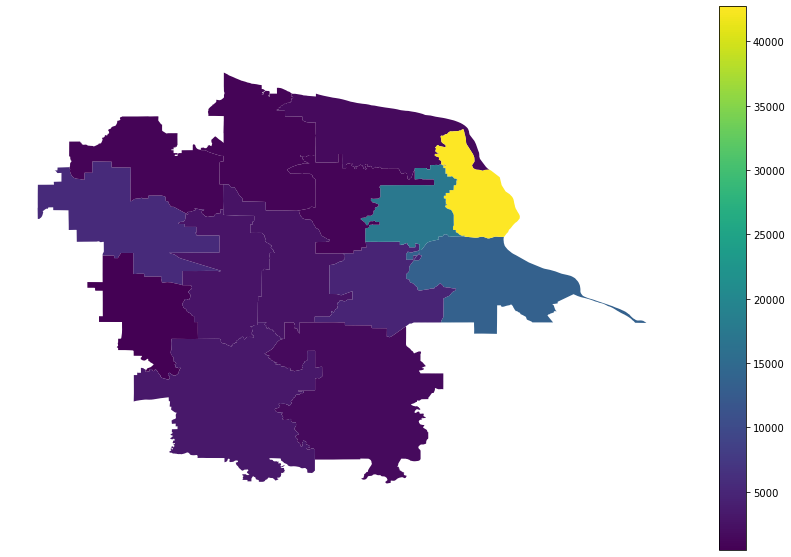

In [52]:
# Dubuque
ax = Dubuque.plot(column='Total_population',legend = True, figsize=(15, 10),
                      )
ax.set_axis_off(); # turns off axis labels

In [53]:
iowa_pop_gdf.shape

(934, 20)

In [54]:
iowa_pop_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 934 entries, 0 to 933
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   ZCTA5CE20                          934 non-null    object  
 1   GEOID20                            934 non-null    object  
 2   CLASSFP20                          934 non-null    object  
 3   MTFCC20                            934 non-null    object  
 4   FUNCSTAT20                         934 non-null    object  
 5   ALAND20                            934 non-null    int64   
 6   AWATER20                           934 non-null    int64   
 7   INTPTLAT20                         934 non-null    object  
 8   INTPTLON20                         934 non-null    object  
 9   geometry                           934 non-null    geometry
 10  Zip_Code                           934 non-null    object  
 11  Total_population                   93

In [55]:
land_area_census = iowa_pop_gdf[['Zip_Code','ZCTA5CE20','ALAND20']]

In [56]:
land_area_census.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\census data\land_area_census.csv')

In [57]:
type(land_area_census)

pandas.core.frame.DataFrame

In [58]:

iowa_pop_gdf.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,Zip_Code,Total_population,25_to_34_years,Median_age_(years),population_density,Median_household_income_(dollars),number_of_stores,county,population_per_store_None,Sales
0,51640,51640,B5,G6350,S,298913924,4033670,+40.6262178,-095.6613422,"POLYGON ((-95.77470 40.57357, -95.77355 40.578...",51640,"1,660.0",163.0,46.0,14.383338874363575,"46,964.0",1.0,Fremont County,"1,660.0","28,739.38"
1,52626,52626,B5,G6350,S,228312761,3985774,+40.6374551,-091.7255911,"POLYGON ((-91.86403 40.57529, -91.86398 40.575...",52626,"1,264.0",91.0,43.6,14.338861118081368,"42,750.0",1.0,Van Buren County,"1,264.0","50,763.45"
2,52542,52542,B5,G6350,S,121264799,151574,+40.6198504,-092.0562370,"POLYGON ((-92.15051 40.60549, -92.15050 40.608...",52542,298.0,63.0,28.3,6.364719714582037,"42,708.0",0.0,Van Buren County,NaN,0.0
3,52573,52573,B5,G6350,S,96683363,1381599,+40.6275690,-091.9288495,"POLYGON ((-92.02973 40.66824, -92.02972 40.671...",52573,193.0,22.0,52.3,5.170152234928444,0.0,0.0,Van Buren County,NaN,0.0
4,51557,51557,B5,G6350,S,194969173,1901656,+41.7336445,-096.0063653,"POLYGON ((-96.13606 41.74169, -96.13438 41.741...",51557,828.0,53.0,53.7,10.999226812939336,"72,292.0",0.0,Harrison County,NaN,0.0


# map of population

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


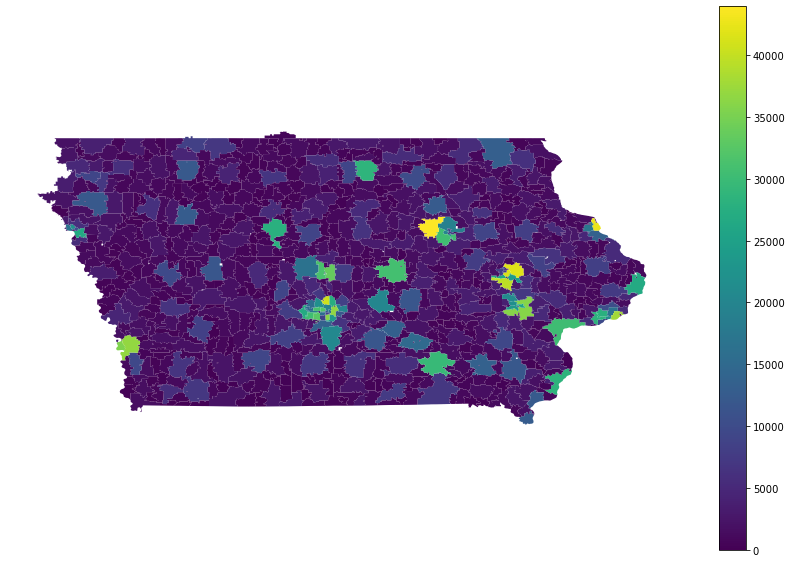

In [59]:
ax = iowa_pop_gdf.plot(column='Total_population',legend = True, figsize=(15, 10),
                      )
ax.set_axis_off(); # turns off axis labels

# map of Sales

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


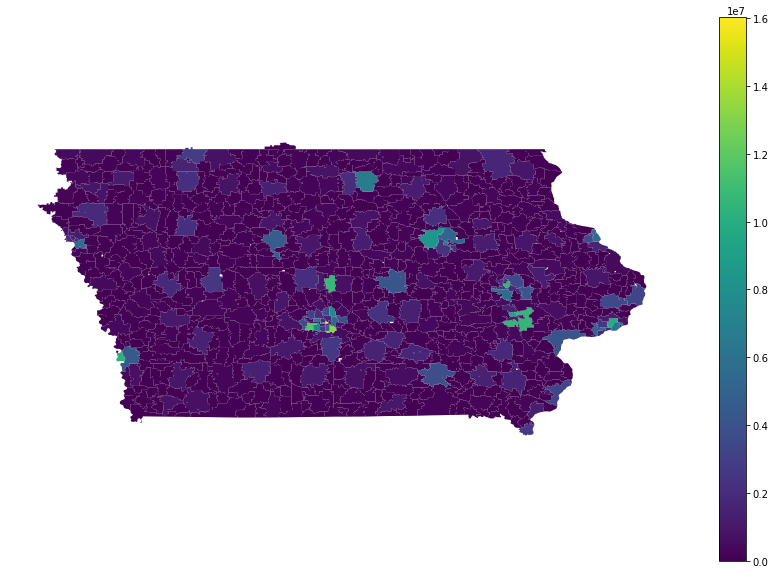

In [60]:
ax = iowa_pop_gdf.plot(column='Sales',legend = True, figsize=(15, 10),
                      )
ax.set_axis_off(); # turns off axis labels

### map of population_per_store_None

In [61]:
type(iowa_pop_gdf['population_per_store_None'][2])

numpy.float64

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


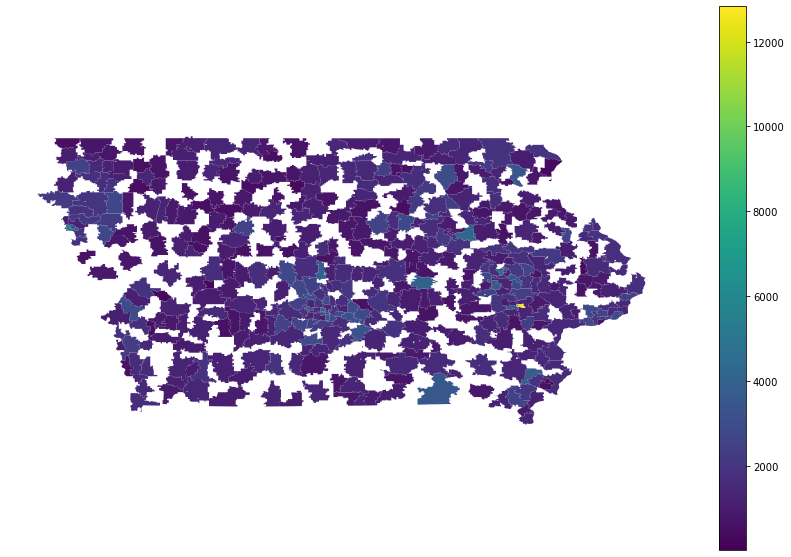

In [62]:


# ax = iowa_pop_gdf.plot(column='population_per_store_None', missing_kwds={'color': 'lightgrey'},legend = True, figsize=(15, 10)) 
                        
ax = iowa_pop_gdf.plot(column='population_per_store_None',legend = True, figsize=(15, 10))                       
ax.set_axis_off(); # turns off axis labels

population 25_to_34_years

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


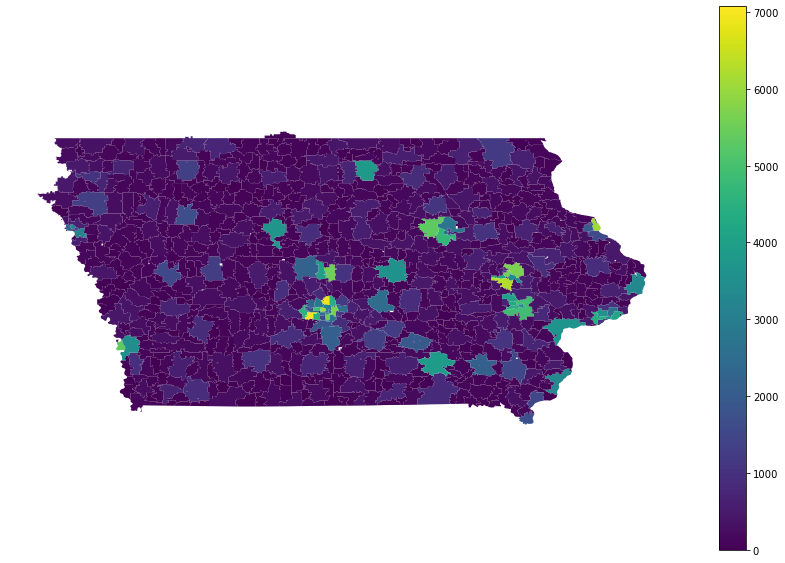

In [63]:

ax = iowa_pop_gdf.plot(column='25_to_34_years',legend = True, figsize=(15, 10), 
                        )
                      
ax.set_axis_off(); # turns off axis labels

Median Income

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


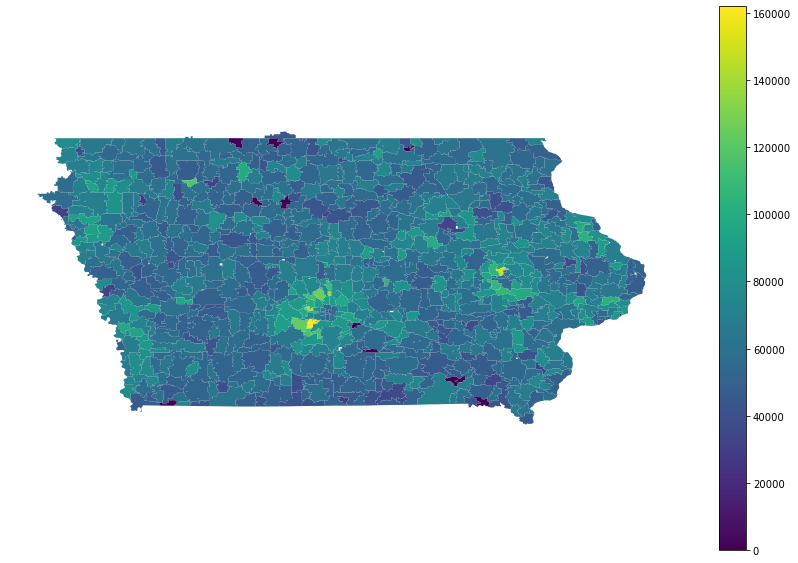

In [64]:


ax = iowa_pop_gdf.plot(column='Median_household_income_(dollars)',legend = True, figsize=(15, 10), 
                        )
                      
ax.set_axis_off(); # turns off axis labels

number_of_stores

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


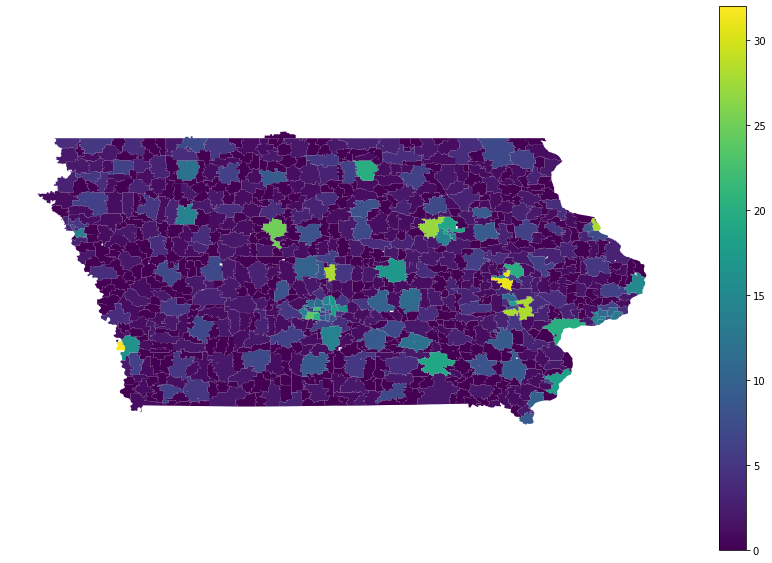

In [65]:
# number_of_stores                   
ax = iowa_pop_gdf.plot(column='number_of_stores',legend = True, figsize=(15, 10), 
                        )
                      
ax.set_axis_off(); # turns off axis labels

In [93]:
iowa_pop_gdf.columns

Index(['ZCTA5CE20', 'GEOID20', 'CLASSFP20', 'MTFCC20', 'FUNCSTAT20', 'ALAND20',
       'AWATER20', 'INTPTLAT20', 'INTPTLON20', 'geometry', 'Zip_Code',
       'Total_population', '25_to_34_years', 'Median_age_(years)',
       'population_density', 'Median_household_income_(dollars)',
       'number_of_stores', 'county', 'population_per_store_None',
       'pct_HH_income_75k_plus', 'Median_Home_Market_Value',
       'pct_change_population', 'pct_Bachelors_degree_or_higher', 'Sales'],
      dtype='object')

pct_Bachelors_degree_or_higher

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


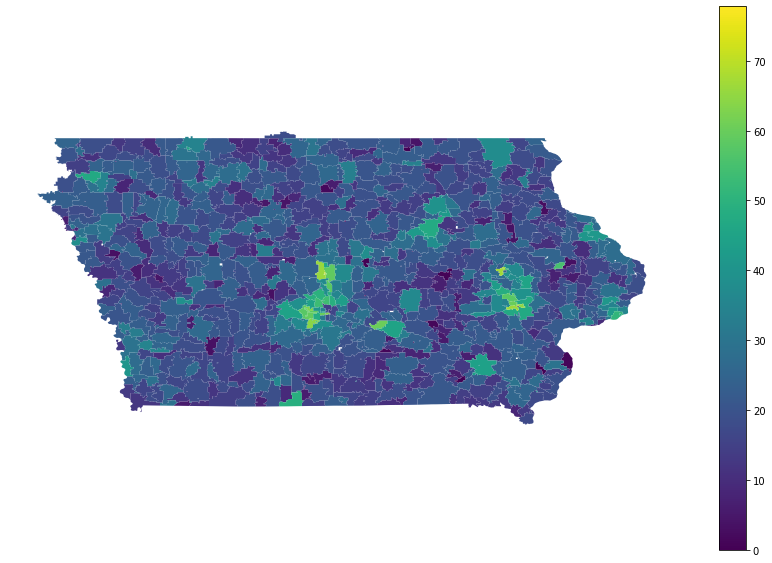

In [94]:
#pct_Bachelors_degree_or_higher           
ax = iowa_pop_gdf.plot(column='pct_Bachelors_degree_or_higher',legend = True, figsize=(15, 10), 
                        )
                      
ax.set_axis_off(); # turns off axis labels



Median_Home_Market_Value

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


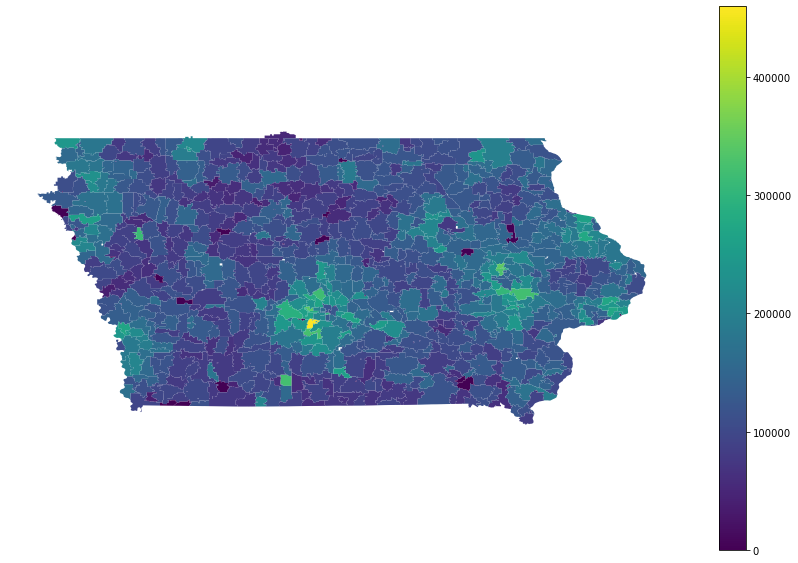

In [96]:
# Median_Home_Market_Value
ax = iowa_pop_gdf.plot(column='Median_Home_Market_Value',legend = True, figsize=(15, 10), 
                        )
                      
ax.set_axis_off(); # turns off axis labels

